<a href="https://colab.research.google.com/github/Ronil999/CODESOFT/blob/main/Movie_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movie Genre Classification

#### In this notebook a machine learning model is built that can predict the genre of a movie based on its description summary. TF-IDF or word embeddings with classifiers such as Naive Bayes, Logistic Regression, Support Vector Machines are implemented.

## Installing & Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

## Data Loading & Framing

In [ ]:
train_path = "/content/train_data.txt"
train_data = pd.read_csv(train_path, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')
train_data

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
23982,Out of Darkness (2004),crime,"""Out of Darkness"" is about a female Spanish h..."
23983,Lost Treasures of the Ancient World: Ancient ...,documentary,The story of India is one of fabulous dynasti...
23984,Flock of Dodos: The Evolution-Intelligent Des...,documentary,"The highly anticipated, comic and controversi..."
23985,"""Rebecca Brand Recipes"" (2012)",short,"I produce Rebecca Brand Recipes, a lifestyle ..."


In [ ]:
test_path = "/content/test_data.txt"
test_data = pd.read_csv(test_path, sep=':::', names=['Id', 'Title', 'Description'], engine='python')
test_data

,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...,...
21265,21266,Breakup.com (2008),The main character of Breakup.com is a clever...
21266,21267,Hiyab (2005),A secondary school in any Spanish city. In a ...
21267,21268,The House of the White Bee (2019),A story sparked by the vivid poetry of Pablo ...
21268,21269,Ema (2017),Ema is a siren who has guided dead souls into...


## EDA

In [ ]:
train_data.describe()

,Title,Genre,Description
count,23986,23986,23986
unique,23986,27,23948
top,Oscar et la dame rose (2009),drama,A retired professor has returned to his estat...
freq,1,5979,6


In [ ]:
    test_data.describe()

,Id
count,21270.000000
mean,10635.500000
std,6140.264449
min,1.000000
25%,5318.250000
50%,10635.500000
75%,15952.750000
max,21270.000000


In [ ]:
train_data.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [ ]:
test_data.isnull().sum()

Id             0
Title          0
Description    0
dtype: int64

In [ ]:
class_distribution = train_data['Genre'].value_counts()
print("Class Distribution:")
print(class_distribution)

Class Distribution:
Genre
 drama           5979
 documentary     5806
 comedy          3261
 short           2294
 horror           971
 thriller         726
 action           574
 western          459
 reality-tv       400
 family           360
 adventure        351
 music            329
 romance          291
 sci-fi           286
 adult            275
 animation        214
 crime            205
 talk-show        183
 sport            182
 fantasy          156
 mystery          135
 musical          113
 biography        110
 history          101
 game-show         85
 news              80
 war               60
Name: count, dtype: int64


In [ ]:
imbalance_ratio = class_distribution.min() / class_distribution.max()
print("Imbalance Ratio:", imbalance_ratio)

Imbalance Ratio: 0.010035122930255895


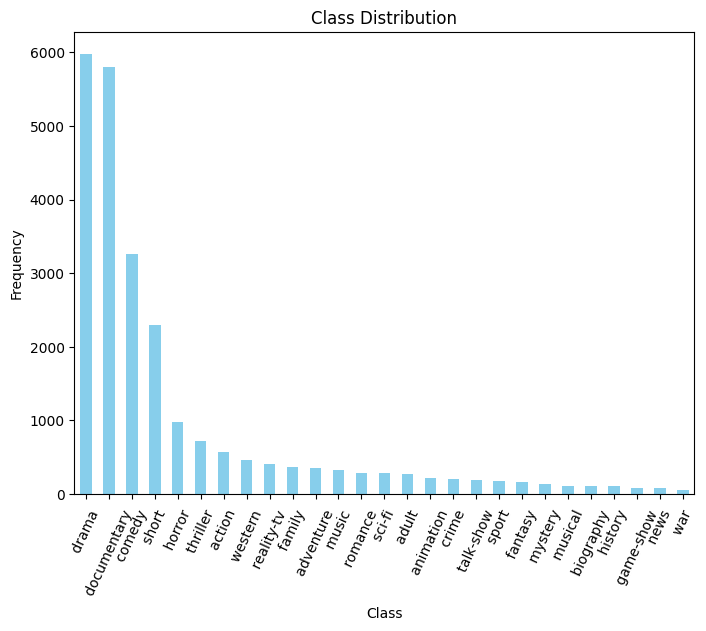

In [ ]:
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=65)
plt.show()

## Modeling

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['Description'])
y_train = train_data['Genre']


nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)


y_train_pred = nb_classifier.predict(X_train_tfidf)


print("Accuracy on training set:", accuracy_score(y_train, y_train_pred))
print("Classification Report on training set:\n", classification_report(y_train, y_train_pred))


Accuracy on training set: 0.5188026348703411


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report on training set:
                precision    recall  f1-score   support

      action        0.89      0.03      0.06       574
       adult        0.00      0.00      0.00       275
   adventure        0.67      0.01      0.01       351
   animation        0.00      0.00      0.00       214
   biography        0.00      0.00      0.00       110
      comedy        0.59      0.43      0.50      3261
       crime        0.00      0.00      0.00       205
 documentary        0.57      0.91      0.70      5806
       drama        0.44      0.86      0.59      5979
      family        0.00      0.00      0.00       360
     fantasy        0.00      0.00      0.00       156
   game-show        0.00      0.00      0.00        85
     history        0.00      0.00      0.00       101
      horror        0.83      0.22      0.35       971
       music        0.83      0.02      0.03       329
     musical        0.00      0.00      0.00       113
     mystery        0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Prediction

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_test = tfidf_vectorizer.fit_transform(test_data['Description'])

In [ ]:
X_test_predictions = nb_classifier.predict(X_test)
test_data['Predicted_Genre'] = X_test_predictions

In [ ]:
test_data.to_csv('predicted_genres.csv', index=False)

print(test_data)

          Id                                Title  \
0          1                Edgar's Lunch (1998)    
1          2            La guerra de papá (1977)    
2          3         Off the Beaten Track (2010)    
3          4              Meu Amigo Hindu (2015)    
4          5                   Er nu zhai (1955)    
...      ...                                  ...   
21265  21266                  Breakup.com (2008)    
21266  21267                        Hiyab (2005)    
21267  21268   The House of the White Bee (2019)    
21268  21269                          Ema (2017)    
21269  21270               Vatreshen glas (2008)    

                                             Description Predicted_Genre  
0       L.R. Brane loves his life - his car, his apar...         comedy   
1       Spain, March 1964: Quico is a very naughty ch...         comedy   
2       One year in the life of Albin and his family ...    documentary   
3       His father has died, he hasn't spoken with hi...       

## Model Pickling/Serialization

In [ ]:
import pickle
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)
with open('nb_classifier.pkl', 'wb') as file:
    pickle.dump(nb_classifier, file)

print("Models pickled successfully.")

Models pickled successfully.
